In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

data = [('Data Scientist', 'Action', 50), ('Data Scientist', 'Comedy', 20),
('Data Scientist', 'Drama', 5), ('ML Engineer', 'Action', 5),
('ML Engineer', 'Comedy', 20), ('ML Engineer', 'Drama', 50),
('GenAI Developer', 'Action', 5), ('GenAI Developer', 'Comedy', 50),
('GenAI Developer', 'Drama', 20)]

df = pd.DataFrame(data, columns=['Role', 'Movie Genre', 'Count'])

In [2]:
# Create a contingency dataframe 
contingency_df = df.pivot(index='Movie Genre', columns='Role', 
                          values='Count')
contingency_df

Role,Data Scientist,GenAI Developer,ML Engineer
Movie Genre,,,
Action,50,5,5
Comedy,20,50,20
Drama,5,20,50


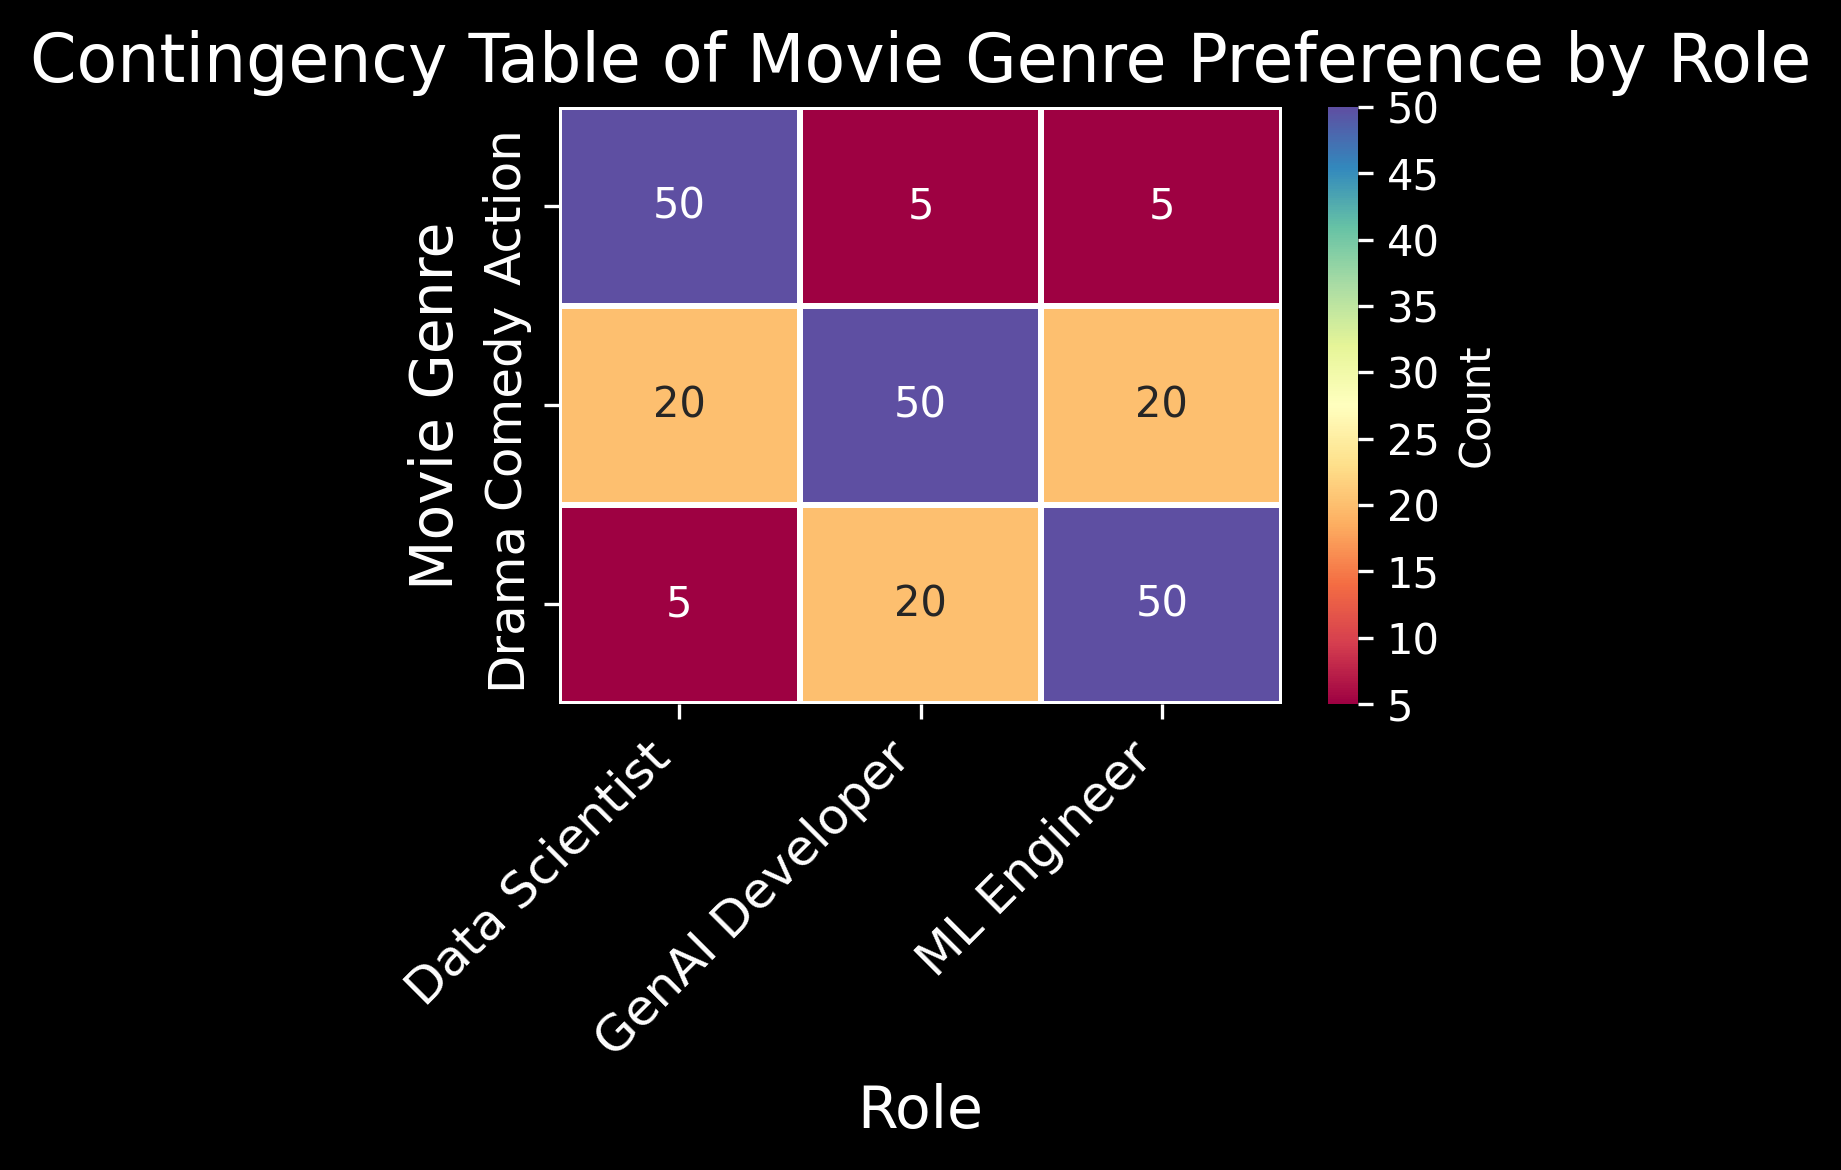

In [3]:
plt.style.use('dark_background')
plt.figure(figsize=(4, 4), dpi=300)
sns.heatmap(contingency_df, annot=True, fmt='d', cmap='Spectral', 
            cbar_kws={'label': 'Count', 'ticks': [*range(0, 51, 5)]}, 
            linecolor='white', linewidths=1)
plt.title('Contingency Table of Movie Genre Preference by Role', fontsize=16)
plt.xlabel('Role', fontsize=14)
plt.ylabel('Movie Genre', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### Chi-Square Statistic
The Chi-Square statistic is a measure used to determine whether there is a significant association between two categorical variables. It is calculated by comparing the observed frequencies in each category of a contingency table with the frequencies that would be expected if there were no association between the variables.

#### Formula
The Chi-Square statistic ($\chi^2$) is calculated as:

$$
\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
$$

Where:
- $O_i$ = Observed frequency for category $i$
- $E_i$ = Expected frequency for category $i$

### Degrees of Freedom
The degrees of freedom (df) for a Chi-Square test is calculated as:

$$
df = (r - 1) \times (c - 1)
$$

Where:
- $r$ = Number of rows in the contingency table
- $c$ = Number of columns in the contingency table


### Cramér's V
Cramér's V is a measure of association between two nominal variables based on the Chi-Square statistic. It provides a normalized value between 0 and 1, which helps in interpreting the strength of the relationship between the variables.

#### Formula
Cramér's V is calculated as:

$$
V = \sqrt{\frac{\chi^2}{n \cdot \min(k - 1, r - 1)}}
$$

Where:
- $\chi^2$ = Chi-Square statistic
- $n$ = Total number of observations
- $k$ = Number of categories in the column variable
- $r$ = Number of categories in the row variable

### Interpretation of Cramér's V
- **0.00 - 0.10**: Weak association
- **0.11 - 0.30**: Moderate association
- **0.31 - 0.50**: Strong association
- **0.51 - 0.70**: Very strong association
- **0.71 - 1.00**: Almost perfect association

In [4]:
# Perform Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(
    contingency_df
)

# Display results
print(f"Chi-Square Statistic: {chi2_stat:.2f}")
print(f"P-value: {p_val:.4f}")

Chi-Square Statistic: 129.50
P-value: 0.0000


In [5]:
# Calculate Cramér's V
n = contingency_table.sum().sum()  # Total number of observations
cramers_v = np.sqrt(
    chi2_stat / (n * (min(contingency_table.shape) - 1))
)

print(f"Degrees of Freedom: {dof}")
print(f"Cramér's V: {cramers_v:.4f}")

Degrees of Freedom: 4
Cramér's V: 0.5364


As you can see, the p-value for the Chi-Square test statistic is less than 0.005; hence, there is a statistically significant association between the role and the movie genre. In fact, since Cramér's V value for the statistic is greater than 0.5, the association is considered quite strong.